<a href="https://colab.research.google.com/github/indmind/2141720003-machine-learning-2023/blob/main/pertemuan3_tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [193]:
data = pd.read_csv('insurance.csv')

In [194]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

<!-- Variable Bebas:
- age
- sex
- bmi
- children
- smoker
- region -->

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


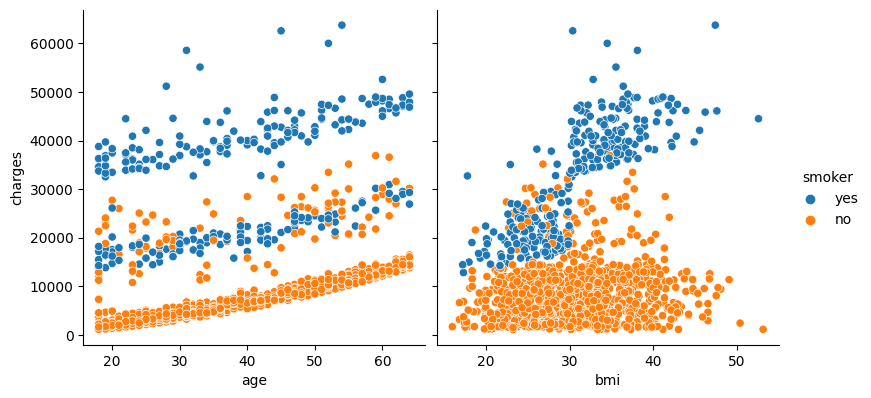

In [195]:
sns.pairplot(data, x_vars=['age', 'bmi'],
             y_vars='charges', size=4, aspect=1, kind='scatter', hue='smoker')
plt.show()

<ipython-input-196-1868d99b7e6c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


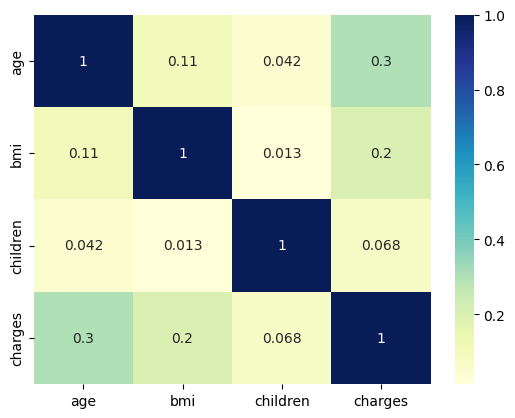

In [196]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Jika dilihat, yang memiliki korelasi cukup tinggi terhadap **charges** adalah age dan bmi. Kemudian setelah melakukan sedikit eksperimen, nilai charges juga sangat bergantung pada umur dan apakah pasien merokok/tidak

In [197]:
le = LabelEncoder()

data['smoker'] = le.fit_transform(data['smoker'])

## 2. Membagi dataset

In [205]:
X = data[['age', 'bmi', 'smoker']]
y = data['charges']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

## 3. Lakukan feature scaling jika diperlukan.

tidak perlu dilakukan feature scaling untuk linear regression, feature scaling dapat digunakan pada SVM karena metode tersebut lebih sensitif terhadap skala data

## 4. Buat model multiple linear regression menggunakan Scikit-Learn

In [207]:
model = LinearRegression()

In [208]:
model.fit(X_train, y_train)

print(f"Intercept B0: {model.intercept_}")
print(f"Koefisien Regressi: {model.coef_}")

Intercept B0: -10266.243741232494
Koefisien Regressi: [  254.73532215   282.19998015 23473.68627484]


In [209]:
y_pred = model.predict(X_test)

In [210]:

# Menghitung R-squared (R2) dari model terlatih
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# # Menampilkan hasil prediksi dan nilai target
# print("Hasil Prediksi Harga Pizza:")
# for i in range(len(y_pred)):
#     print(f"Data Test {i + 1}: Prediksi ${y_pred[i]}, Target ${y_test.values[i]}")

# Menampilkan nilai R-squared
print(f"\nR-squared (R2): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")


R-squared (R2): 0.77
MAE (Mean Absolute Error): 4132.80
MSE (Mean Squared Error): 36285171.50
